# Evaluate different models for datasets

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid", palette=None, font_scale=1.3)

figPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical_T1/figures"
os.makedirs(figPath, exist_ok=True)

# `uponAdmission` - compare different clincial+sterol combinations

- `boruta_100`: no sterols included
- `boruta_90`: sterols from boruta-driven feature selection included (n=4)
- `boruta+bestSterols`: best boruta (boruta_100) and best sterols (from "T1" folder)
- `borutaManual`: boruta_100 without `main_reason_for_hospital_admission`

Text(0.5, 1.0, 'Sterol Comparison')

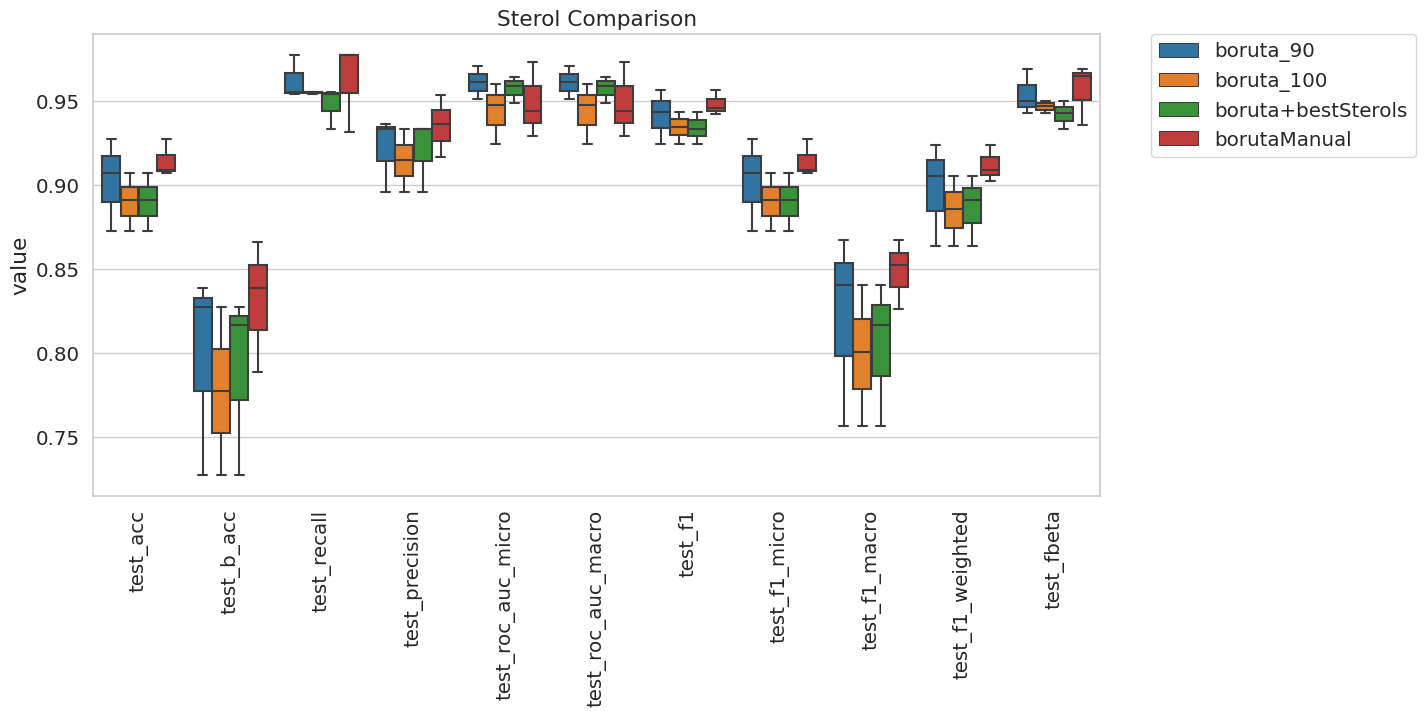

In [2]:
resultsPath_hosp = f"../../results/prediction/featureSelection/12_uponAdmission/boruta_90/modelComparison/"
resultsPath_adm = f"../../results/prediction/featureSelection/12_uponAdmission/boruta_100/modelComparison"
resultsPath_3 = f"../../results/prediction/featureSelection/12_uponAdmission/boruta+bestSterols/modelComparison"
resultsPath_4 = f"../../results/prediction/featureSelection/12_uponAdmission/borutaManual/modelComparison"

''' 
Read data
'''
df_hosp = pd.read_csv(f"{resultsPath_hosp}/RandomForest_score.csv")
df_adm = pd.read_csv(f"{resultsPath_adm}/RandomForest_score.csv")
df_3 = pd.read_csv(f"{resultsPath_3}/RandomForest_score.csv")
df_4 = pd.read_csv(f"{resultsPath_4}/RandomForest_score.csv")

df_hosp["selVars"] = "boruta_90"
df_adm["selVars"] = "boruta_100"
df_3["selVars"] = "boruta+bestSterols"
df_4["selVars"] = "borutaManual"
df = pd.concat([df_hosp, df_adm, df_3, df_4], axis=0, ignore_index=True)

''' 
Plot
'''
df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
df_plot = df_plot.melt("selVars")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="selVars")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Sterol Comparison")

In [3]:
print(df[df["selVars"] == "boruta_90"].mean())

df[df["selVars"] == "boruta+bestSterols"].mean()

fit_time              7.357325
score_time            0.378346
test_acc              0.902469
test_b_acc            0.797980
test_recall           0.962626
test_precision        0.921779
test_roc_auc_micro    0.961195
test_roc_auc_macro    0.961195
test_f1               0.941691
test_f1_micro         0.902469
test_f1_macro         0.821321
test_f1_weighted      0.897688
test_fbeta            0.954124
dtype: float64


/tmp/ipykernel_3639297/3911961101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[df["selVars"] == "boruta_90"].mean())
/tmp/ipykernel_3639297/3911961101.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["selVars"] == "boruta+bestSterols"].mean()


fit_time              6.992530
score_time            0.361123
test_acc              0.890348
test_b_acc            0.790572
test_recall           0.947811
test_precision        0.920833
test_roc_auc_micro    0.957475
test_roc_auc_macro    0.957475
test_f1               0.933962
test_f1_micro         0.890348
test_f1_macro         0.804494
test_f1_weighted      0.886650
test_fbeta            0.942181
dtype: float64

# Compare prediction with Sterols vs without  - RandomForest

- `uponAdmission`: for maximum comparison use feature set that simply added sterols --> `boruta+bestSterols`

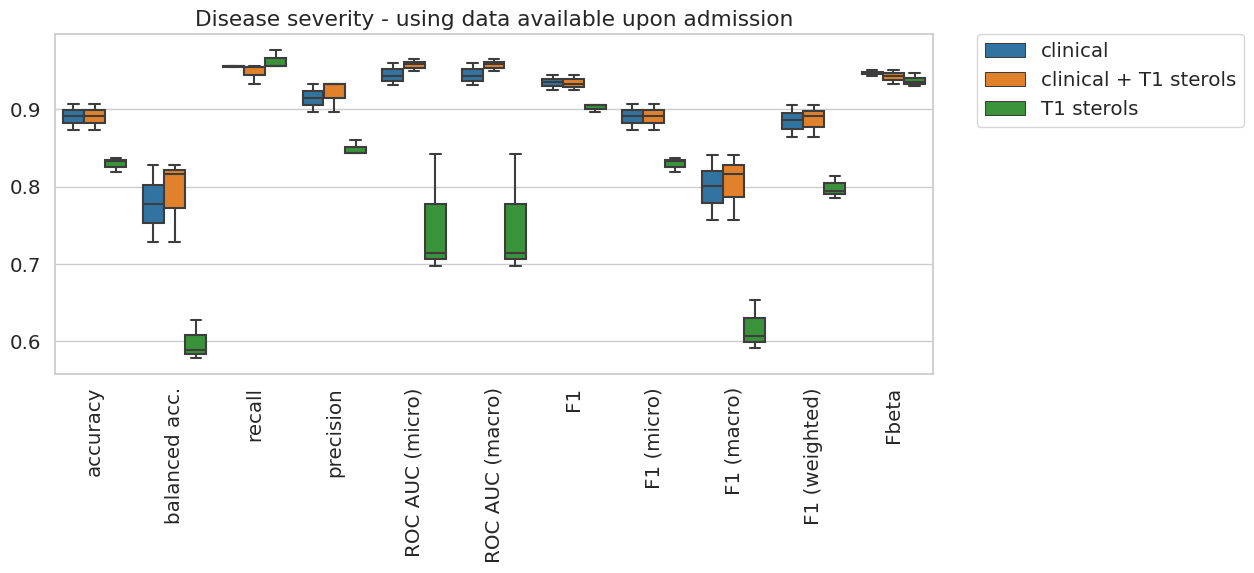

In [10]:
''' 
Read only clinical data
'''

resultsPath_clinical = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/featureSelection"



''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_beforeAdmission","12_uponAdmission"]: #, "12_hospitalization"

    ''' 
    Read only clinical data
    '''
    resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_score.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = "clinical_"+dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)
    ''' 
    Read clinical+T1 data
    '''
    if dataset != "12_uponAdmission":
        resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical_T1/results/prediction/featureSelection/{dataset}/boruta/modelComparison"  
    else:
        resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical_T1/results/prediction/featureSelection/{dataset}/boruta+bestSterols/modelComparison"  ### boruta with 100 perc + sterols
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_score.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = "clinical+T1_"+dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

''' 
Read sterol only data
'''
resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/T1/results/prediction/featureSelection/12_sterol_discoveryValidation/boruta/modelComparison"
for file in os.listdir(resultsPath):
    if file.endswith("RandomForest_score.csv"):
        tmp = pd.read_csv(f"{resultsPath}/{file}")
        tmp["timepoint"] = "T1_uponAdmission"
        input = pd.concat([input,tmp], axis=0, ignore_index=True)

    

''' 
Plot
'''
df = input.copy()
df = df.drop(["fit_time", "score_time", "model"], axis=1)
df.columns = ["accuracy","balanced acc.", "recall", "precision", "ROC AUC (micro)", "ROC AUC (macro)", "F1", "F1 (micro)", "F1 (macro)", "F1 (weighted)", "Fbeta", "timepoint"]

df_plot = df[df["timepoint"].str.contains("uponAdmission")]
df_plot = df_plot.melt("timepoint")
df_plot["timepoint"].replace("clinical_uponAdmission", "clinical", inplace=True)
df_plot["timepoint"].replace("clinical+T1_uponAdmission", "clinical + T1 sterols", inplace=True)
df_plot["timepoint"].replace("T1_uponAdmission", "T1 sterols", inplace=True)

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="timepoint")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("")
ax.set_title(f"Disease severity - using data available upon admission")
ax.set_ylabel("")
plt.tight_layout()
plt.savefig(f"{figPath}/compareClinicalT1_allMetrices.png", dpi=300)

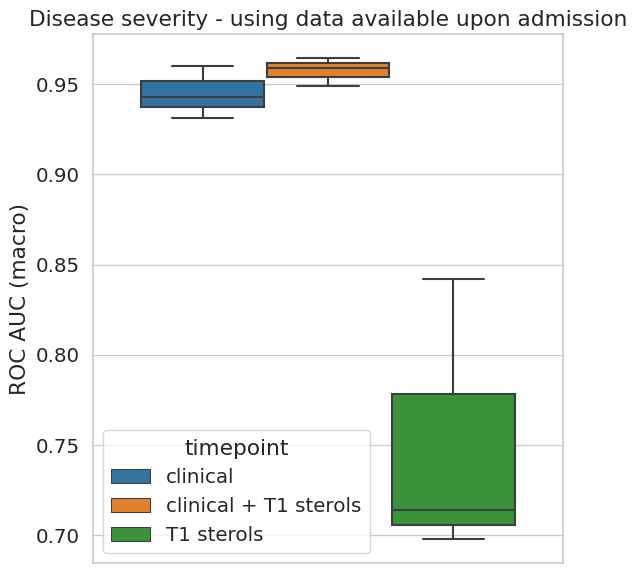

In [11]:
''' 
Plot
'''
df = input.copy()
df = df.loc[:,["test_roc_auc_macro", "timepoint"]]
df.columns = ["ROC AUC (macro)", "timepoint"]

df_plot = df[df["timepoint"].str.contains("uponAdmission")]
df_plot = df_plot.melt("timepoint")
df_plot["timepoint"].replace("clinical_uponAdmission", "clinical", inplace=True)
df_plot["timepoint"].replace("clinical+T1_uponAdmission", "clinical + T1 sterols", inplace=True)
df_plot["timepoint"].replace("T1_uponAdmission", "T1 sterols", inplace=True)

fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="timepoint")
#ax.tick_params(axis='x', rotation=90)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_title(f"Disease severity - using data available upon admission")
ax.set_ylabel("ROC AUC (macro)")
plt.tight_layout()
plt.savefig(f"{figPath}/compareClinicalT1_rocaucmacro.png", dpi=300)

In [26]:
print(df[df["timepoint"] == "clinical_uponAdmission"].median())
print(df[df["timepoint"] == "T1_uponAdmission"].median())
print(df[df["timepoint"] == "clinical+T1_uponAdmission"].median())

ROC AUC (macro)    0.943182
dtype: float64
ROC AUC (macro)    0.713636
dtype: float64
ROC AUC (macro)    0.959091
dtype: float64


/tmp/ipykernel_3609413/2254536754.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[df["timepoint"] == "clinical_uponAdmission"].median())
/tmp/ipykernel_3609413/2254536754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[df["timepoint"] == "T1_uponAdmission"].median())
/tmp/ipykernel_3609413/2254536754.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[df["timepoint"] == "clinical+T1_uponAdmission"].median())


/tmp/ipykernel_3609413/644981732.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["timepoint"].replace("clinical_uponAdmission", "clinical", inplace=True)
/tmp/ipykernel_3609413/644981732.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["timepoint"].replace("clinical+T1_uponAdmission", "clinical + T1 sterols", inplace=True)
/tmp/ipykernel_3609413/644981732.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

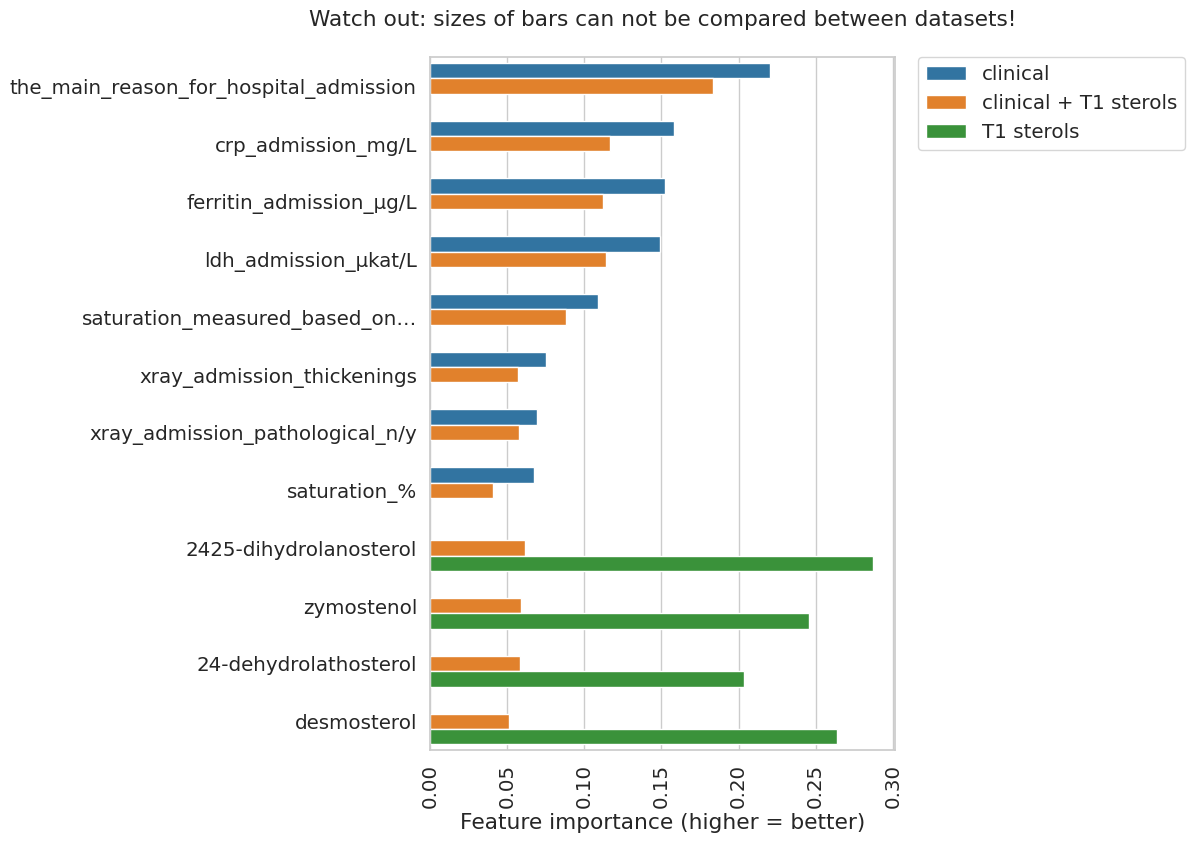

In [7]:
''' 
Read only clinical data
'''

resultsPath_clinical = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/featureSelection"



''' 
Read Boruta's data
'''

input = pd.DataFrame()
for dataset in ["12_beforeAdmission","12_uponAdmission"]: #, "12_hospitalization"

    ''' 
    Read only clinical data
    '''
    resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/featureSelection/{dataset}/boruta/modelComparison"
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_featureImportance.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = "clinical_"+dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)
    ''' 
    Read clinical+T1 data
    '''
    if dataset != "12_uponAdmission":
        resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical_T1/results/prediction/featureSelection/{dataset}/boruta/modelComparison"  
    else:
        resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical_T1/results/prediction/featureSelection/{dataset}/boruta+bestSterols/modelComparison"  ### boruta with 100 perc + sterols
    for file in os.listdir(resultsPath):
        if file.endswith("RandomForest_featureImportance.csv"):
            tmp = pd.read_csv(f"{resultsPath}/{file}")
            tmp["timepoint"] = "clinical+T1_"+dataset.split("_")[1]
            input = pd.concat([input,tmp], axis=0, ignore_index=True)

''' 
Read sterol only data
'''
resultsPath = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/T1/results/prediction/featureSelection/12_sterol_discoveryValidation/boruta/modelComparison"
for file in os.listdir(resultsPath):
    if file.endswith("RandomForest_featureImportance.csv"):
        tmp = pd.read_csv(f"{resultsPath}/{file}")
        tmp["timepoint"] = "T1_uponAdmission"
        input = pd.concat([input,tmp], axis=0, ignore_index=True)


  

''' 
Plot
'''
df_plot = input[input["timepoint"].str.contains("uponAdmission")]
df_plot["timepoint"].replace("clinical_uponAdmission", "clinical", inplace=True)
df_plot["timepoint"].replace("clinical+T1_uponAdmission", "clinical + T1 sterols", inplace=True)
df_plot["timepoint"].replace("T1_uponAdmission", "T1 sterols", inplace=True)

fig, ax = plt.subplots(figsize=(6,9))
sns.barplot(data=df_plot, x="fi", y="var", hue="timepoint")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Feature importance (higher = better)")
ax.set_ylabel("")
ax.set_title(f"Watch out: sizes of bars can not be compared between datasets!\n")
plt.tight_layout()
plt.savefig(f"{figPath}/compareClinicalT1_fi.png", dpi=300,  bbox_inches = "tight")


In [8]:
# ''' 
# Read Eva's data
# '''
# resultsPath_hosp = f"../../results/prediction/featureSelection/eva/modelComparison/publication"
# resultsPath_adm = f"../../results/prediction/featureSelection/eva/modelComparison/publication_admission"

# df_hosp = pd.read_csv(f"{resultsPath_hosp}/RandomForest_featureImportance.csv")
# df_adm = pd.read_csv(f"{resultsPath_adm}/RandomForest_featureImportance.csv")
# df_hosp["timepoint"] = "eva_hospitalization"
# df_adm["timepoint"] = "eva_uponAdmission"
# #df = pd.concat([df_hosp, df_adm], axis=0, ignore_index=True)
# df = df_hosp

# ''' 
# Read Boruta's data
# '''

# input = pd.DataFrame()
# for dataset in ["12_uponAdmission", "12_hospitalization"]: #12_beforeAdmission
#     varPath = f"../../results/featureSelection/{dataset}/boruta.txt"
#     resultsPath = f"../../results/prediction/featureSelection/{dataset}/boruta/modelComparison"
#     for file in os.listdir(resultsPath):
#         if file.endswith("RandomForest_featureImportance.csv"):
#             tmp = pd.read_csv(f"{resultsPath}/{file}")
#             tmp["timepoint"] = dataset.split("_")[1]
#             input = pd.concat([input,tmp], axis=0, ignore_index=True)

# df = pd.concat([df, input], axis=0, ignore_index=True)

# # ''' 
# # Plot
# # '''

# # df_plot = df.drop(["fit_time", "score_time", "model"], axis=1)
# # df_plot = df_plot.melt("timepoint")

# fig, ax = plt.subplots(figsize=(13,6))
# sns.barplot(data=df, x="var", y="fi", hue="timepoint")
# ax.tick_params(axis='x', rotation=90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# ax.set_xlabel("")
# ax.set_title(f"Watch out: sizes of bars can not be compared between datasets!")